In [1]:
# library for preprocessing
import numpy as np
import cv2 as cv
import os
import random
import matplotlib.pyplot as plt

# library for model implementation
from tensorflow import keras
from tensorflow.keras import models

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
DIRECTORY = 'Dataset'
CATEGORIES = ['Bacterialleafblight', 'Brownspot', 'HEALTHY', 'Leafsmut']

In [3]:
SIZE = 224

DATA = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr, (SIZE, SIZE))
        DATA.append([img_arr, label])

In [4]:
len(DATA)

510

In [5]:
random.shuffle(DATA)

In [6]:
DATA[0]

[array([[[146, 183, 179],
         [202, 219, 205],
         [242, 188, 150],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 66, 123, 121],
         [125, 188, 199],
         [225, 217, 194],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 72, 148, 141],
         [  6, 113, 135],
         [180, 227, 216],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [7]:
X = []
Y = []

for FEATURES, TARGET in DATA:
    X.append(FEATURES)
    Y.append(TARGET)

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
X.shape

(510, 224, 224, 3)

In [10]:
X.shape

(510, 224, 224, 3)

In [11]:
Y.shape

(510,)

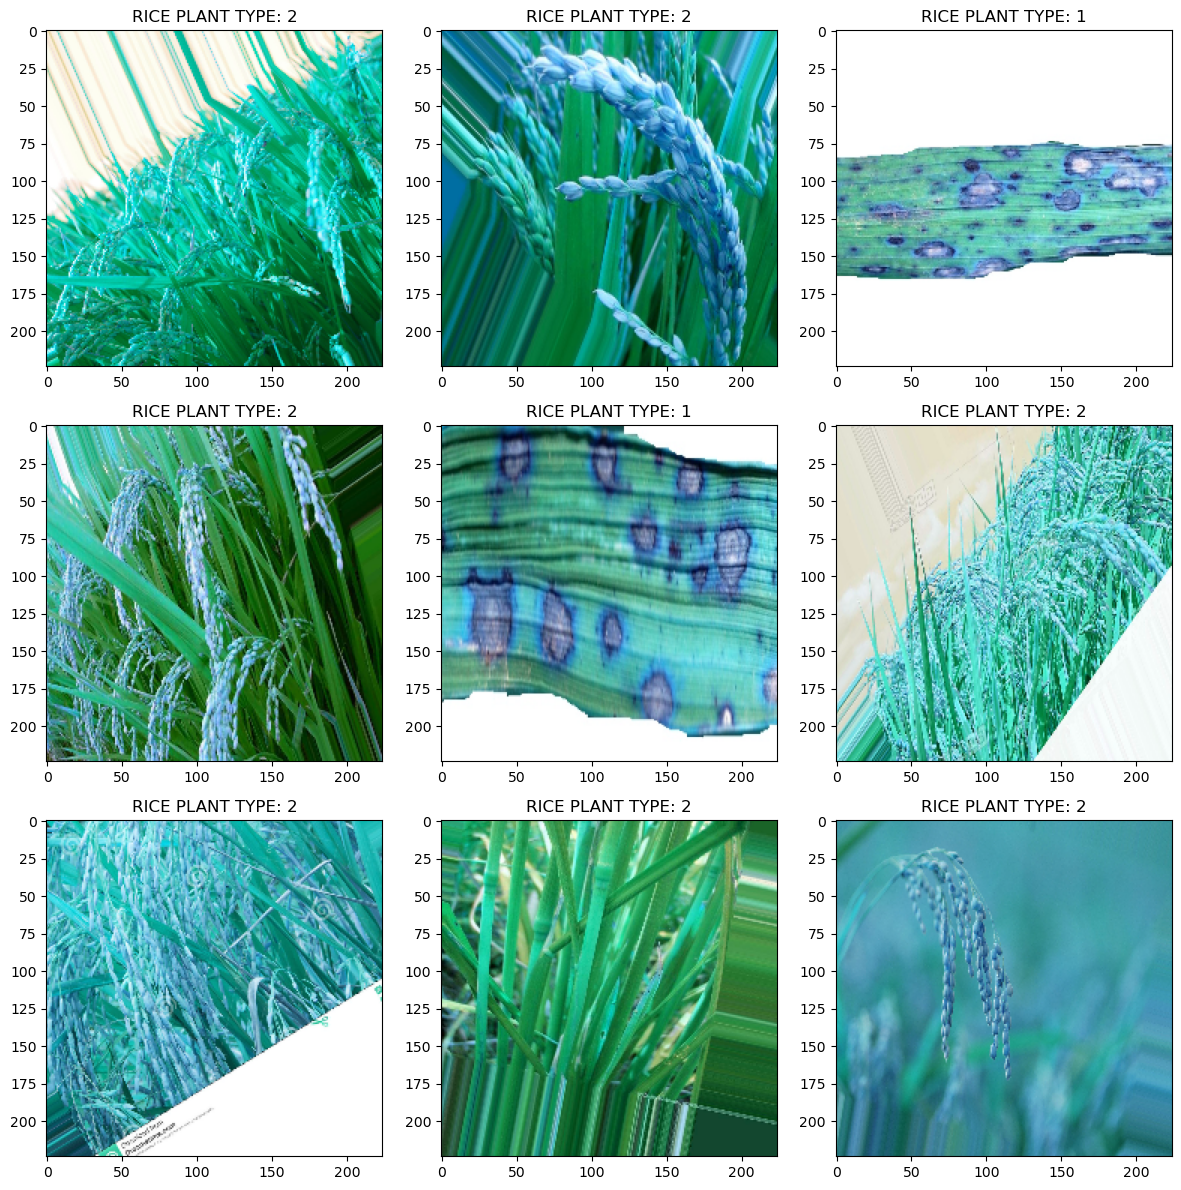

In [12]:
# Here Type Represent {0 : 'Bacterialleafblight', 1 : 'Brownspot', 2  : 'HEALTHY', 3 : 'LEAFsmut'}

fig,ax=plt.subplots(3, 3)
fig.set_size_inches(12,12)
for i in range(3):
    for j in range (3):
        l=random.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('RICE PLANT TYPE: '+ str(Y[l]))
        
plt.tight_layout()

#### SPLITING THE DATA FOR TRAINING AND TESTING

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [15]:
X_train.shape

(382, 224, 224, 3)

In [16]:
X_test.shape

(128, 224, 224, 3)

In [17]:
y_train.shape

(382,)

In [18]:
y_test.shape

(128,)

In [19]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 74, 184, 169],
        [ 72, 187, 167],
        [ 73, 184, 165]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 65, 180, 163],
        [ 72, 187, 164],
        [ 77, 186, 163]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 68, 186, 167],
        [ 86, 201, 178],
        [ 94, 201, 175]]

In [20]:
y_train[:20]

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2])

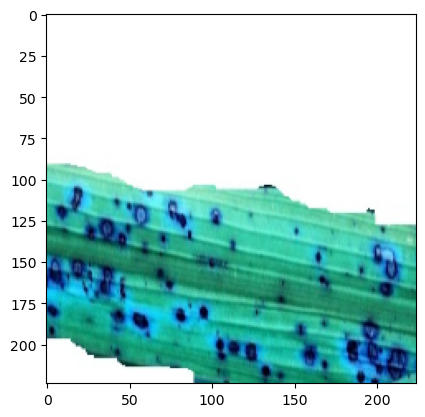

In [21]:
plt.imshow(X_train[0])
plt.show()

In [22]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([1, 2, 2, 1, 1])

In [23]:
classes = ['Bacterialleafblight', 'Brownspot', 'HEALTHY', 'Leafsmut']

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

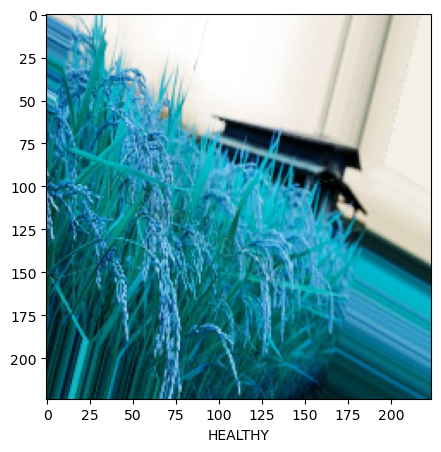

In [25]:
plot_sample(X_train, y_train, 1)

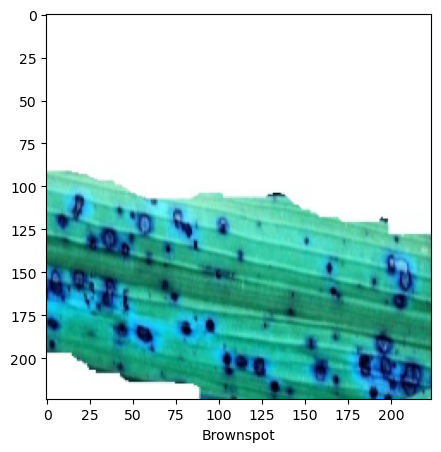

In [26]:
plot_sample(X_train, y_train, 0)

In [27]:
### Data Normalization

X_train = X_train/255
X_test = X_test/255

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### VGG19 Model Implementation

In [28]:
from keras.applications.vgg19 import VGG19

In [29]:
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten

vgg19= Sequential()

mod1 = VGG19(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=4,
    weights='imagenet')

for layer in mod1.layers:
    layer.trainabel=False
    

vgg19.add(mod1)
vgg19.add(Flatten())
vgg19.add(Dense(4, activation='softmax'))

vgg19.summary()

80134624/80134624 [==============================] - 21s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 20,026,436
Trainable params: 20,026,436
Non-trainable params: 0
_________________________________________________________________


In [30]:
vgg19.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [31]:
model3 = vgg19.fit(datagen.flow(X_train, y_train), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12/12 [==============================] - 268s 22s/step - loss: 20.7105 - accuracy: 0.6021 - val_loss: 0.7047 - val_accuracy: 0.7812
Epoch 2/10
12/12 [==============================] - 255s 21s/step - loss: 0.9458 - accuracy: 0.7592 - val_loss: 0.7359 - val_accuracy: 0.7812
Epoch 3/10
12/12 [==============================] - 249s 21s/step - loss: 0.7321 - accuracy: 0.7592 - val_loss: 0.5872 - val_accuracy: 0.7812
Epoch 4/10
12/12 [==============================] - 239s 20s/step - loss: 0.4876 - accuracy: 0.7670 - val_loss: 0.3342 - val_accuracy: 0.8672
Epoch 5/10
12/12 [==============================] - 239s 20s/step - loss: 0.5697 - accuracy: 0.7461 - val_loss: 0.3396 - val_accuracy: 0.8359
Epoch 6/10
12/12 [==============================] - 239s 20s/step - loss: 0.4152 - accuracy: 0.8063 - val_loss: 0.3223 - val_accuracy: 0.8359
Epoch 7/10
12/12 [==============================] - 238s 20s/step - loss: 0.3549 - accuracy: 0.8377 - val_loss: 0.4540 - val_accuracy: 0.8281
Epoch

In [32]:
vgg19.evaluate(X_test, y_test)

4/4 [==============================] - 18s 4s/step - loss: 0.3425 - accuracy: 0.8516


[0.3425445854663849, 0.8515625]

4/4 [==============================] - 18s 4s/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.67      0.25      0.36         8
           2       0.96      1.00      0.98       100
           3       0.33      0.70      0.45        10

    accuracy                           0.85       128
   macro avg       0.49      0.49      0.45       128
weighted avg       0.82      0.85      0.82       128



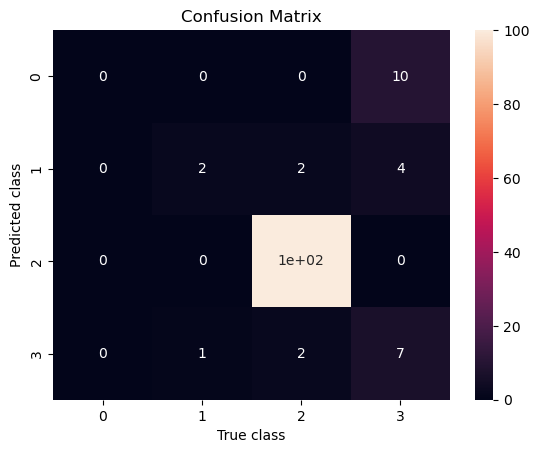

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
pred3 = vgg19.predict(X_test)
pred3_class = [np.argmax(element) for element in pred3]

print('Classification Report : \n', classification_report(y_test, pred3_class))

conmax = confusion_matrix(y_test, pred3_class)

sns.heatmap(conmax,annot=True)
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

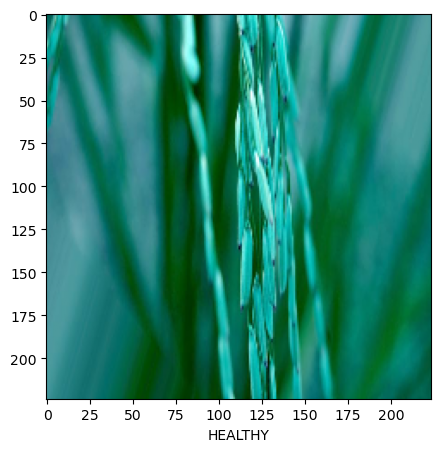

In [34]:
plot_sample(X_test, y_test, 5)

In [35]:
classes[pred3_class[5]]

'HEALTHY'

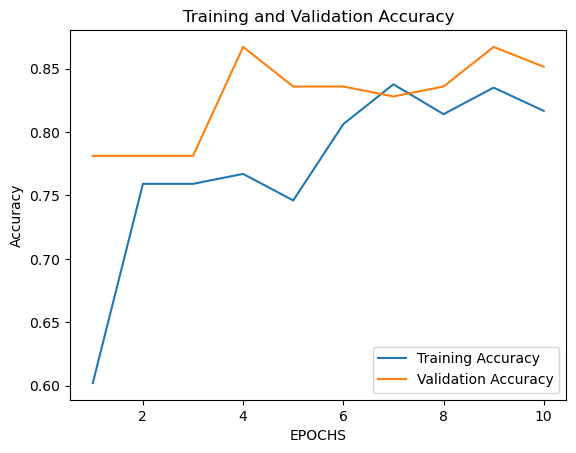

In [36]:
# plotting the graph for accuracy and vel_accuracy
acc = model3.history['accuracy']
val_acc = model3.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

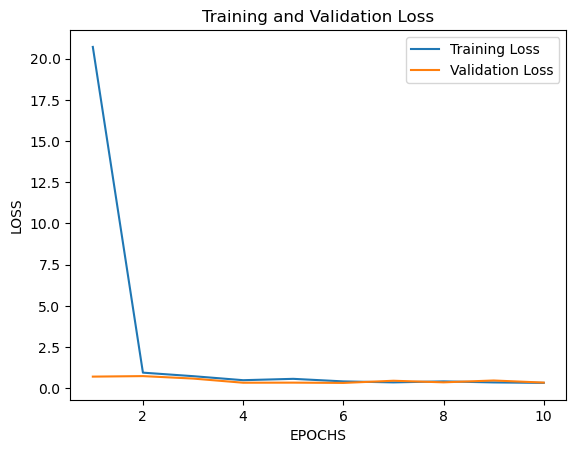

In [37]:
# plotting the graph for accuracy and vel_accuracy
loss = model3.history['loss']
val_loss = model3.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

4/4 [==============================] - 18s 4s/step


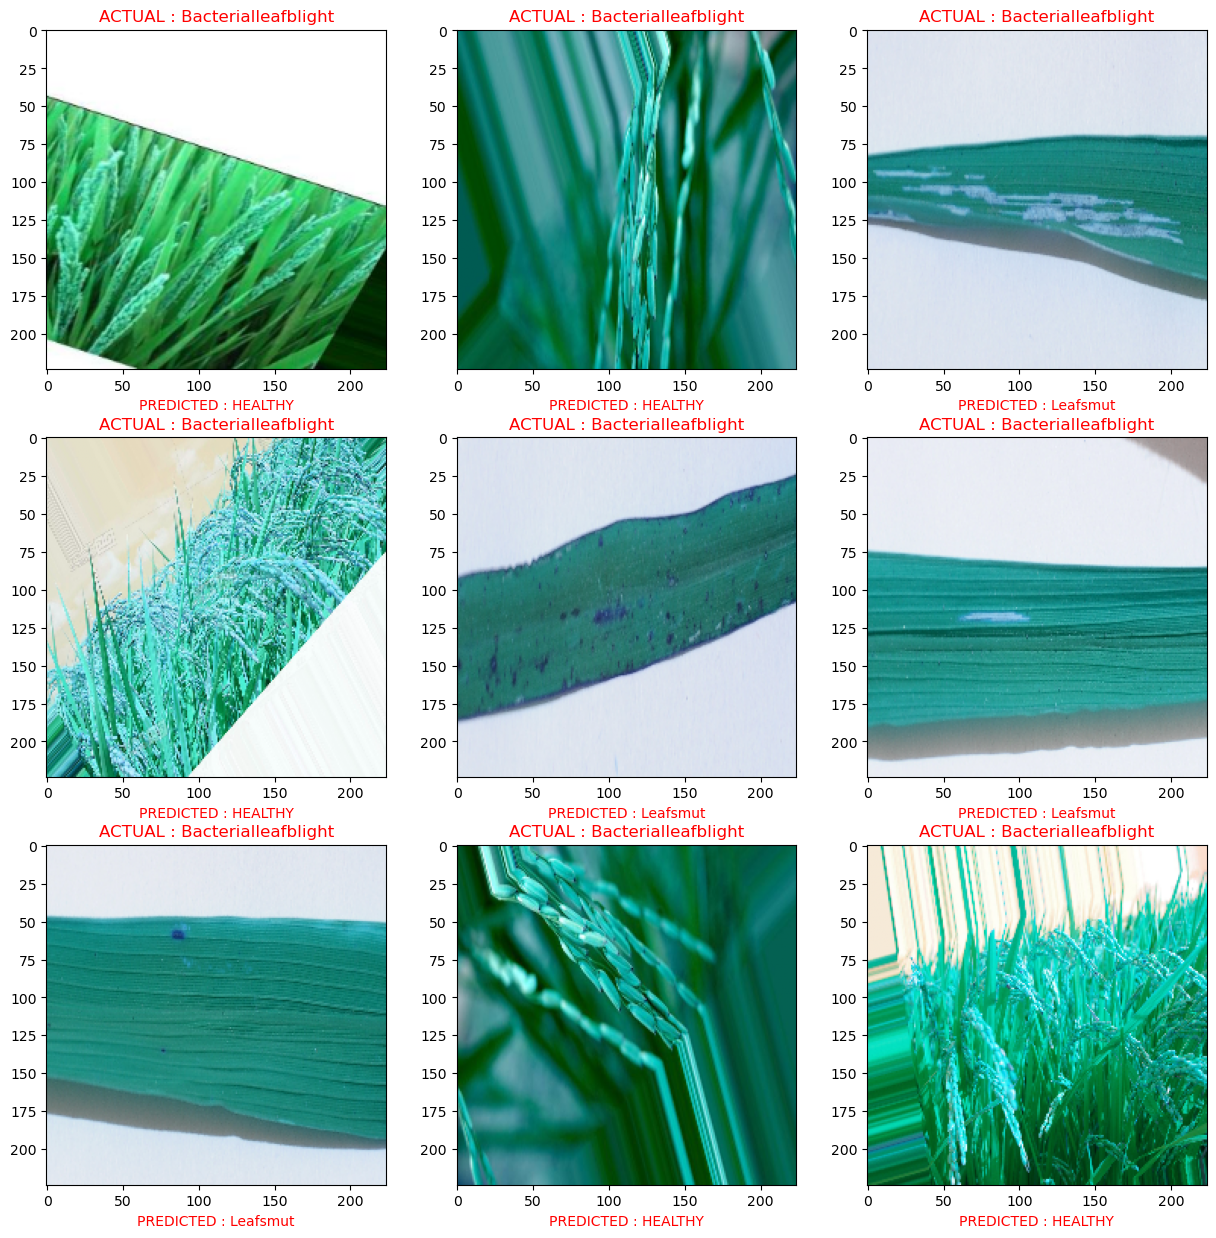

In [38]:
# categories = np.sort(os.listdir(DIRECTORY))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        if(classes[np.argmax(y_test[k])] == classes[np.argmax(vgg19.predict(X_test)[k])]):
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(vgg19.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(vgg19.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

### ResNet101 Model Implementation

In [61]:
from keras.applications.resnet import ResNet101

In [62]:
from tensorflow.keras import Sequential
from keras.layers import Dense, Flatten

resnet101 = Sequential()

mod2 = ResNet101(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=4,
    weights='imagenet')

for layer in mod2.layers:
    layer.trainabel=False
    

resnet101.add(mod2)
resnet101.add(Flatten())
resnet101.add(Dense(4, activation='softmax'))

resnet101.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 42,666,372
Trainable params: 42,561,028
Non-trainable params: 105,344
_________________________________________________________________


In [63]:
resnet101.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [64]:
model4 = resnet101.fit(datagen.flow(X_train, y_train), epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
12/12 [==============================] - 210s 17s/step - loss: 0.5408 - accuracy: 0.8194 - val_loss: 75095.3281 - val_accuracy: 0.7812
Epoch 2/5
12/12 [==============================] - 193s 16s/step - loss: 0.2891 - accuracy: 0.9031 - val_loss: 172534768.0000 - val_accuracy: 0.7812
Epoch 3/5
12/12 [==============================] - 191s 16s/step - loss: 0.5919 - accuracy: 0.9162 - val_loss: 404270.6875 - val_accuracy: 0.0625
Epoch 4/5
12/12 [==============================] - 189s 16s/step - loss: 0.6078 - accuracy: 0.8351 - val_loss: 31461316.0000 - val_accuracy: 0.0625
Epoch 5/5
12/12 [==============================] - 190s 16s/step - loss: 0.3681 - accuracy: 0.8874 - val_loss: 197580.1406 - val_accuracy: 0.7812


In [65]:
resnet101.evaluate(X_test, y_test)

4/4 [==============================] - 13s 3s/step - loss: 197580.1406 - accuracy: 0.7812


[197580.140625, 0.78125]

4/4 [==============================] - 14s 3s/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         8
           2       0.78      1.00      0.88       100
           3       0.00      0.00      0.00        10

    accuracy                           0.78       128
   macro avg       0.20      0.25      0.22       128
weighted avg       0.61      0.78      0.69       128



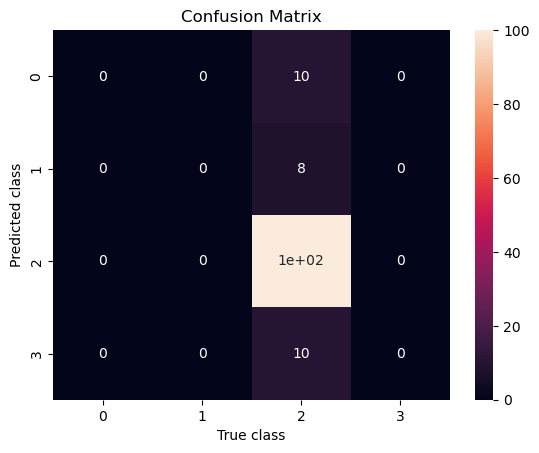

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
pred4 = resnet101.predict(X_test)
pred4_class = [np.argmax(element) for element in pred4]

print('Classification Report : \n', classification_report(y_test, pred4_class))

conmax = confusion_matrix(y_test, pred4_class)

sns.heatmap(conmax,annot=True)
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

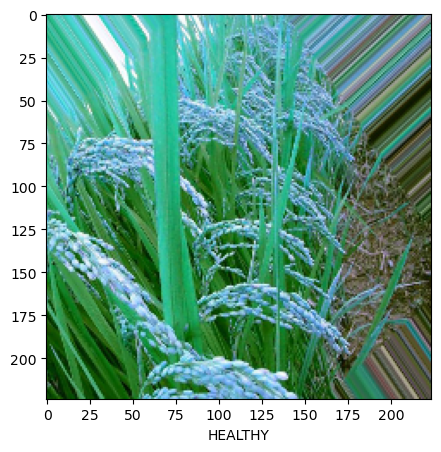

In [67]:
plot_sample(X_test, y_test, 3)

In [68]:
classes[pred4_class[3]]

'HEALTHY'

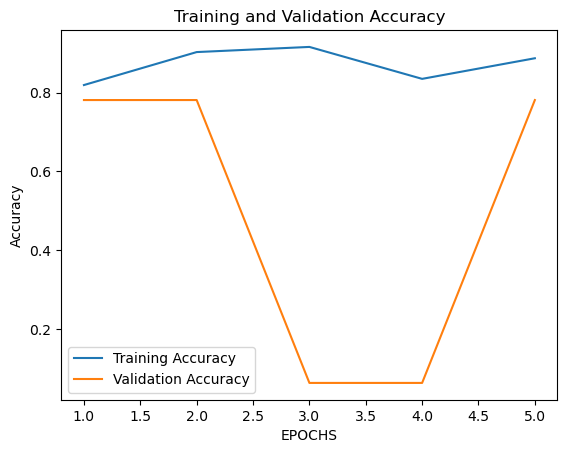

In [69]:
# plotting the graph for accuracy and vel_accuracy
acc = model4.history['accuracy']
val_acc = model4.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

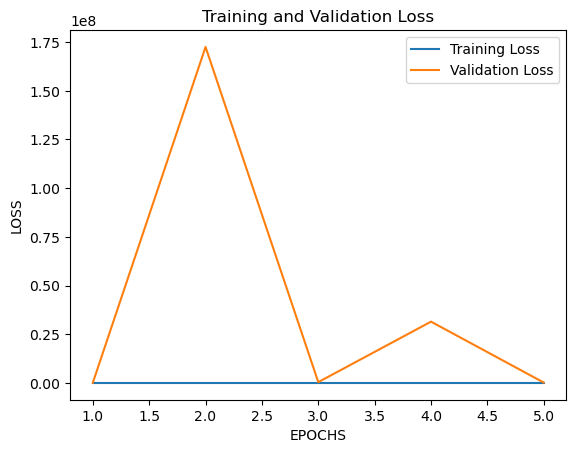

In [70]:
# plotting the graph for accuracy and vel_accuracy
loss = model4.history['loss']
val_loss = model4.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

4/4 [==============================] - 13s 3s/step


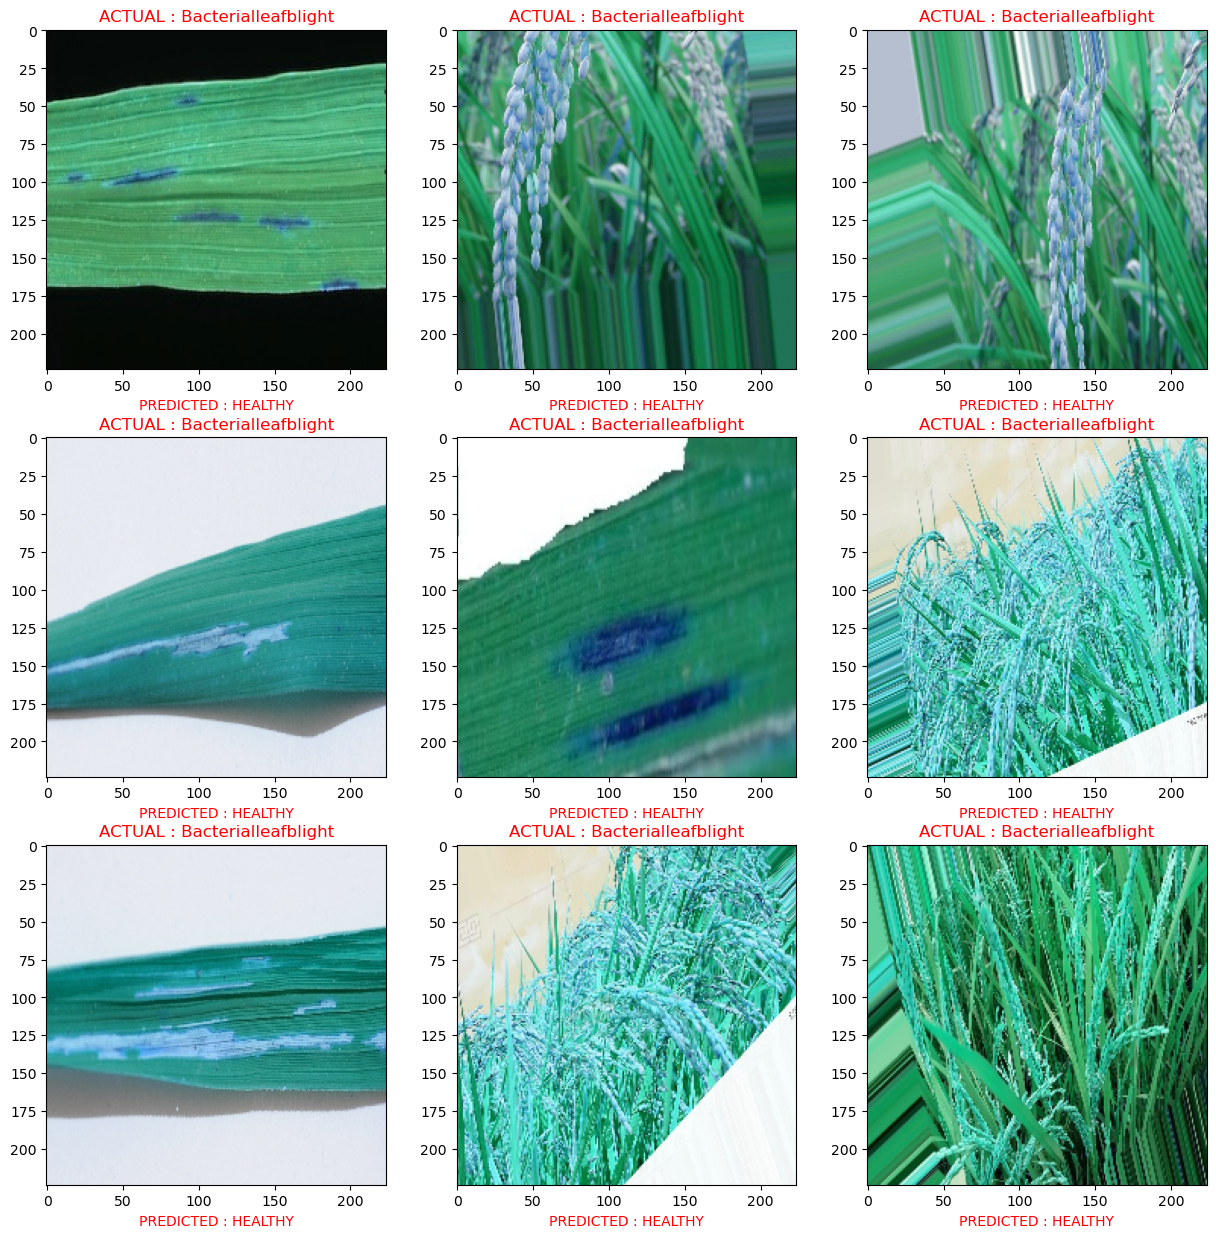

In [71]:
# categories = np.sort(os.listdir(DIRECTORY))
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        if(classes[np.argmax(y_test[k])] == classes[np.argmax(resnet101.predict(X_test)[k])]):
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(resnet101.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("ACTUAL : " + classes[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED : " + classes[np.argmax(resnet101.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')